<a href="https://colab.research.google.com/github/manlio99/Materia-de-aprendizaje/blob/master/5_DataMining/3_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering (Agrupación) con Scikit-Learn

## El archivo de datos

Para demostrar la agrupación en clústeres en Scikit-learn usaremos la siguiente imagen como datos de entrada.

<img src=https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/5_DataMining/data/butterfly.jpg width="500">

Agruparemos los valores RGB de píxeles para obtener una segmentación de múltiples etiquetas de la imagen. Primero, carguemos la imagen en una matriz de números usando [`Image.open ()`](https://pillow.readthedocs.io/en/stable/):

In [ ]:
from PIL import Image
import numpy as np
import requests
from io import BytesIO

# Image open
response = requests.get('https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/5_DataMining/data/butterfly.jpg')
image = Image.open(BytesIO(response.content))
image = np.array(image)

# Tamaño de imagen (en píxeles) 481x960. Los últimos 3 canales son los valores de color RGB. 
original_shape = image.shape
print(original_shape)

(481, 960, 3)


Las matrices de imágenes se pueden visualizar usando [`plt.imshow ()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imshow.html):

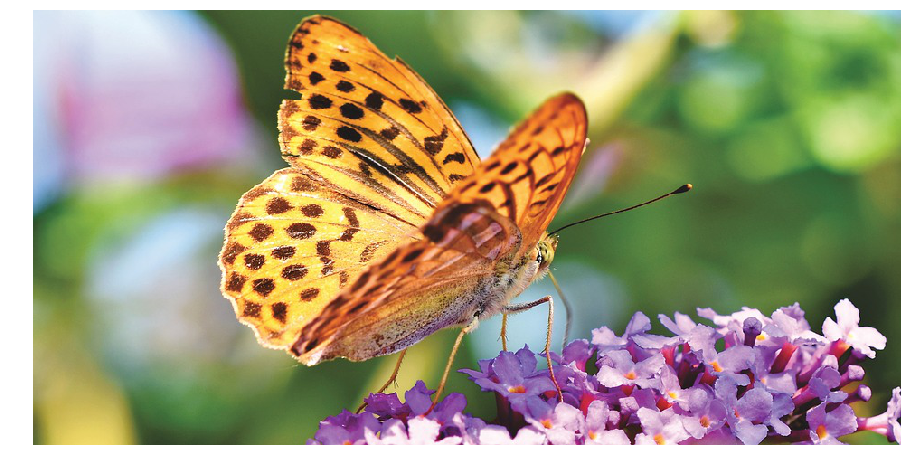

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(18,8))

# No axis
plt.axis('off')
plt.imshow(image)

Para realizar una agrupación simple de píxeles, primero debemos eliminar las dimensiones de ancho y alto, por lo tanto, *flattening(aplanar)* la matriz:

In [ ]:
# Aplanar las atenuaciones de ancho y alto, mantener RGB.
X = np.reshape(image, [-1, 3])
print(X.shape) 

(461760, 3)


Ahora ejecutamos [`MeanShift ()`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html) en la imagen para agrupar la matriz de píxeles X. La agrupación de cambio medio tiene como objetivo descubra "blobs(manchas)" en una densidad uniforme de muestras. Es un algoritmo basado en centroides y funciona actualizando candidatos para centroides para que sean la media de los puntos dentro de una región determinada. Estos candidatos luego se filtran en una etapa de posprocesamiento para eliminar casi duplicados para formar el conjunto final de centroides.
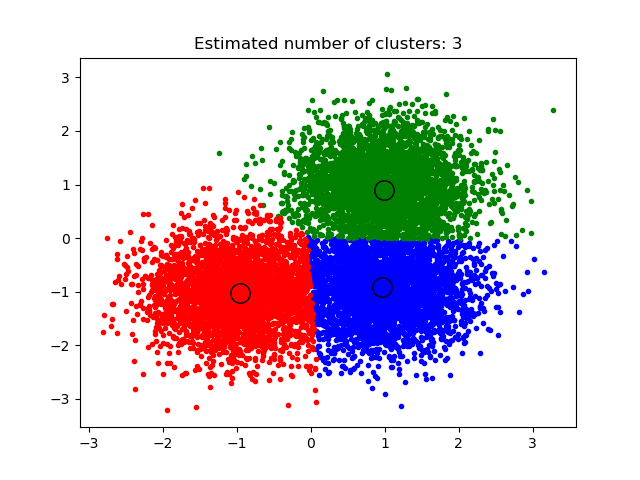

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Run MeanShift
bandwidth = estimate_bandwidth(X, quantile=0.1, n_samples=100)
ms = MeanShift(bandwidth=bandwidth,bin_seeding=True, n_jobs=4)
ms.fit(X)

MeanShift(bandwidth=50.54852150942299, bin_seeding=True, n_jobs=4)

Imprima información de salida agrupada para tener una idea de lo que se hizo. Por lo que vemos, esto produjo 4 grupos, (por lo tanto, 4 colores centroides). Si vuelve a ejecutar este cuaderno con diferentes parámetros, puede encontrar resultados diferentes.

In [ ]:
# Etiquetado por píxel
labels = ms.labels_

# Clusters centros
cluster_centers = ms.cluster_centers_
print("Cluster centers:\n{}".format(cluster_centers))

# Numero de clusters
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("Number of estimated clusters :{}".format(n_clusters_))

Cluster centers:
[[ 82.77994529 116.03817873  59.46351522]
 [195.77418627 185.08153131 208.68783953]
 [239.57766667 181.53952778  76.63338889]
 [187.06755614 104.72885266  53.70528299]]
Number of estimated clusters :4


Dado que los centros son colores RGB, podemos dibujarlos usando [`sns.palplot`](https://seaborn.pydata.org/tutorial/color_palettes.html):

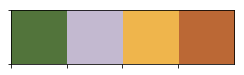

In [ ]:
import seaborn as sns
color_clusters = np.floor(cluster_centers).astype(int)/255
sns.palplot(sns.color_palette(color_clusters))

Finalmente, dibujemos el etiquetado de la imagen en grupos:

In [ ]:
# Transformar en una imagen segmentada
segmented_image = np.reshape(labels, original_shape[:2])  

In [ ]:
# Reemplazar etiquetas con centroides RGB
image_color_clusters       = np.array(image, copy=True)  

for i in range(0,n_clusters_):
    mask = (segmented_image == i)
    image_color_clusters[mask] = color_clusters[i]*255

(-0.5, 959.5, 480.5, -0.5)

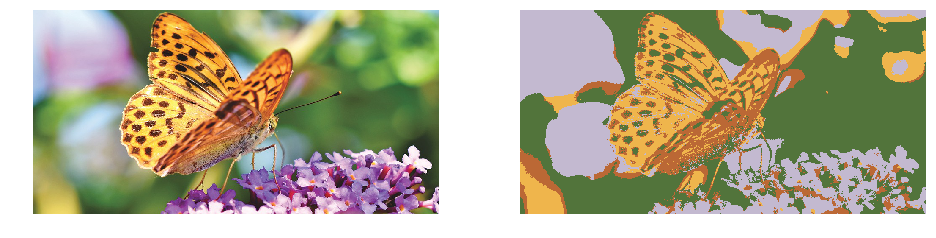

In [ ]:
# Plot la imagen original y la segmentación
plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(image_color_clusters)
plt.axis('off')